In [6]:
import pandas as pd

# Replace 'data.csv' with your file path
df = pd.read_csv('DS 325 Final Project.csv')

# Now `df` is a DataFrame containing your CSV data
print(df.head())

  observation_date  DGS3MO  DGS6MO  DGS1  DGS2  DGS3  DGS5  DGS7  DGS10  \
0       2005-01-01    2.37    2.68  2.86  3.22  3.39  3.71  3.97   4.22   
1       2005-02-01    2.58    2.85  3.03  3.38  3.54  3.77  3.97   4.17   
2       2005-03-01    2.80    3.09  3.30  3.73  3.91  4.17  4.33   4.50   
3       2005-04-01    2.84    3.14  3.32  3.65  3.79  4.00  4.16   4.34   
4       2005-05-01    2.90    3.17  3.33  3.64  3.72  3.85  3.94   4.14   

   DGS20  DGS30  
0   4.77   4.77  
1   4.61   4.56  
2   4.89   4.77  
3   4.75   4.65  
4   4.56   4.49  


In [9]:
import pandas as pd

# Replace 'data.csv' with your file path
df = pd.read_csv('USREC.csv')

# Now `df` is a DataFrame containing your CSV data
print(df.head())

  observation_date  USREC
0       2005-01-01      0
1       2005-02-01      0
2       2005-03-01      0
3       2005-04-01      0
4       2005-05-01      0


In [11]:
import pandas as pd


baa = pd.read_csv('DBAA.csv', parse_dates=['observation_date'])
aaa = pd.read_csv('DAAA.csv', parse_dates=['observation_date'])


baa = baa.rename(columns={'DBAA': 'yield_baa'})
aaa = aaa.rename(columns={'DAAA': 'yield_aaa'})


df = pd.merge(baa, aaa, on='observation_date', how='inner')


df['risk_premium'] = df['yield_baa'] - df['yield_aaa']


df['year'] = df['observation_date'].dt.year
annual_prem = df.groupby('year')['risk_premium'].mean().reset_index()

print(df.head())        # monthly spread
print(annual_prem)      # yearly average spread


  observation_date  yield_baa  yield_aaa  risk_premium  year
0       2005-01-01       6.02       5.36          0.66  2005
1       2005-02-01       5.82       5.20          0.62  2005
2       2005-03-01       6.06       5.40          0.66  2005
3       2005-04-01       6.05       5.33          0.72  2005
4       2005-05-01       6.01       5.15          0.86  2005
    year  risk_premium
0   2005      0.829167
1   2006      0.891667
2   2007      0.926667
3   2008      1.815000
4   2009      1.982500
5   2010      1.095000
6   2011      1.025000
7   2012      1.261667
8   2013      0.866667
9   2014      0.691667
10  2015      1.112500
11  2016      1.051667
12  2017      0.696667
13  2018      0.870000
14  2019      0.988333
15  2020      1.125833
16  2021      0.690000
17  2022      0.998333
18  2023      1.050833
19  2024      0.709167
20  2025      0.620000


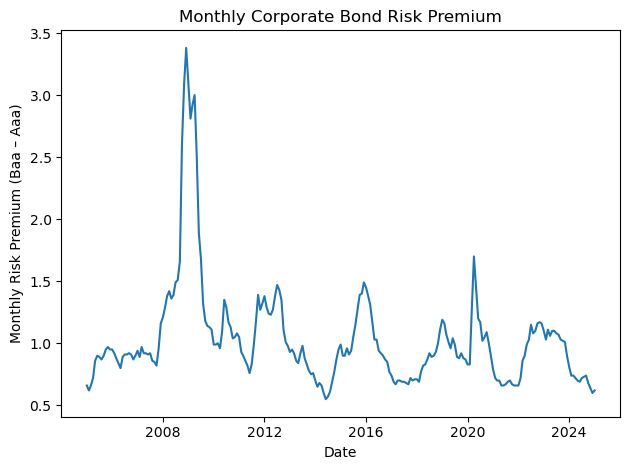

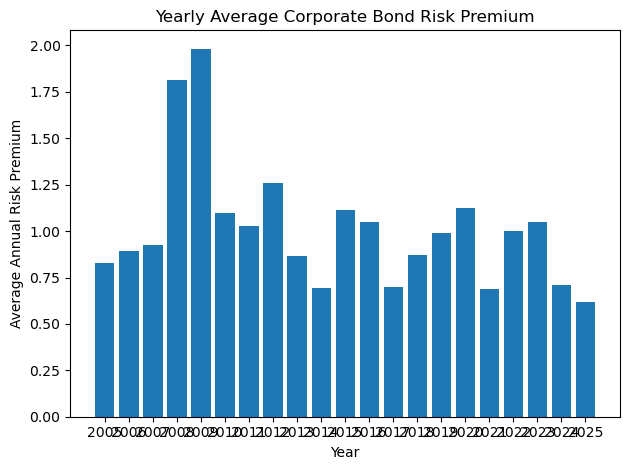

In [14]:
import pandas as pd
import matplotlib.pyplot as plt



fig, ax = plt.subplots()
ax.plot(df['observation_date'], df['risk_premium'])
ax.set_xlabel('Date')
ax.set_ylabel('Monthly Risk Premium (Baa – Aaa)')
ax.set_title('Monthly Corporate Bond Risk Premium')
plt.tight_layout()

# 2) Annual Average Risk Premium
fig, ax = plt.subplots()
ax.bar(annual_prem['year'].astype(str), annual_prem['risk_premium'])
ax.set_xlabel('Year')
ax.set_ylabel('Average Annual Risk Premium')
ax.set_title('Yearly Average Corporate Bond Risk Premium')
plt.tight_layout()

plt.show()


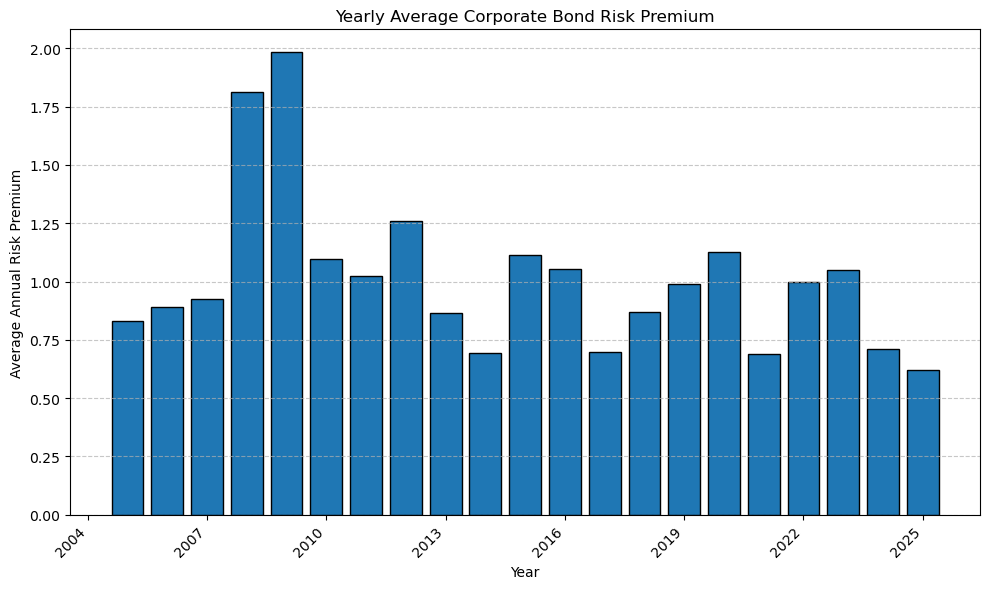

In [15]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

years = annual_prem['year']
premiums = annual_prem['risk_premium']

fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart
ax.bar(years, premiums, edgecolor='black')

# Labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Average Annual Risk Premium')
ax.set_title('Yearly Average Corporate Bond Risk Premium')

# Force integer ticks and reduce the number of ticks
ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=10))

# Rotate tick labels for clarity
plt.xticks(rotation=45, ha='right')

# Add horizontal grid lines
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [1]:
import pandas as pd

# Load all your datasets
yields = pd.read_csv('DS 325 Final Project.csv', parse_dates=['observation_date'])
recession = pd.read_csv('USREC.csv', parse_dates=['observation_date'])
unemployment = pd.read_csv('UNRATE.csv', parse_dates=['observation_date'])
industrial_prod = pd.read_csv('INDPRO.csv', parse_dates=['observation_date'])

# Merge everything by observation_date
df = yields.merge(recession, on='observation_date')\
           .merge(unemployment, on='observation_date')\
           .merge(industrial_prod, on='observation_date')

# Feature Engineering
df['10y_minus_3m'] = df['DGS10'] - df['DGS3MO']
df['10y_minus_2y'] = df['DGS10'] - df['DGS2']

# Shift the recession indicator by 12 months forward
df['recession_next_year'] = df['USREC'].shift(-12)

# Drop rows with NaNs created by shifting
df = df.dropna()

# Features (X) and Target (y)
feature_cols = ['10y_minus_3m', '10y_minus_2y', 'UNRATE', 'INDPRO']
X = df[feature_cols]
y = df['recession_next_year']

print(X.head())
print(y.head())

   10y_minus_3m  10y_minus_2y  UNRATE   INDPRO
0          1.85          1.00     5.3  95.8785
1          1.59          0.79     5.4  96.5709
2          1.70          0.77     5.2  96.4345
3          1.50          0.69     5.2  96.6347
4          1.24          0.50     5.1  96.7251
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: recession_next_year, dtype: float64


Model: Logistic Regression
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        44
         1.0       0.00      0.00      0.00         2

    accuracy                           0.96        46
   macro avg       0.48      0.50      0.49        46
weighted avg       0.91      0.96      0.94        46



c:\Users\delen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\delen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\delen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


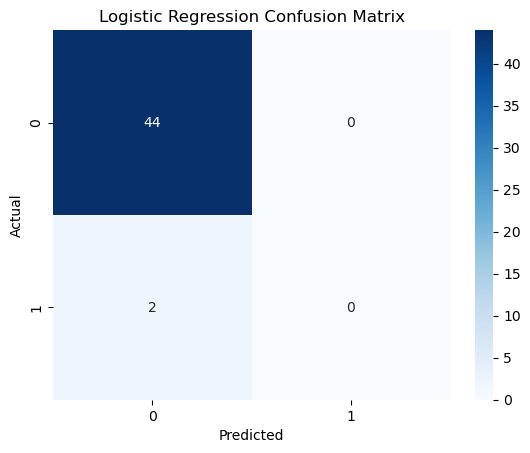

Model: Decision Tree
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        44
         1.0       0.40      1.00      0.57         2

    accuracy                           0.93        46
   macro avg       0.70      0.97      0.77        46
weighted avg       0.97      0.93      0.95        46



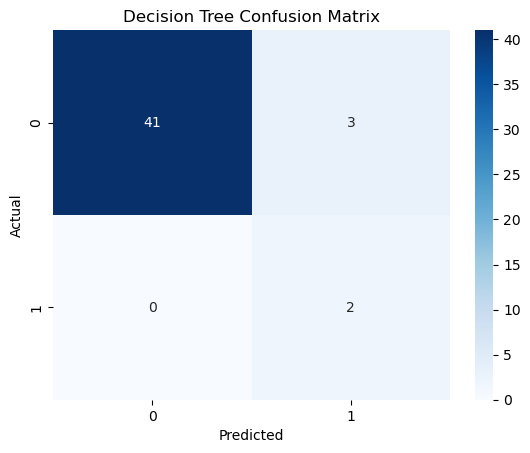

Model: Random Forest
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98        44
         1.0       0.50      1.00      0.67         2

    accuracy                           0.96        46
   macro avg       0.75      0.98      0.82        46
weighted avg       0.98      0.96      0.96        46



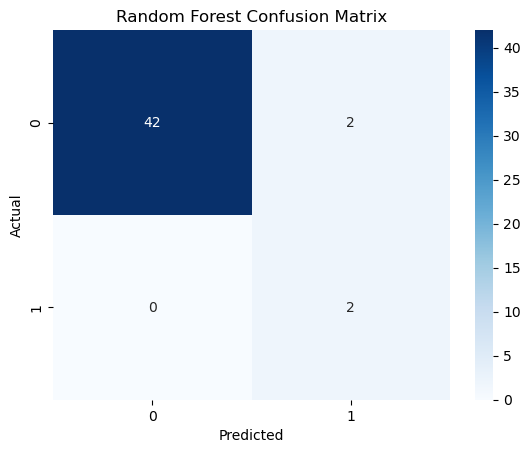

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Print Evaluation
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()